In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import neattext.functions as nfx

In [10]:
#Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [11]:
!git clone https://github.com/Jcharis/end2end-nlp-project

fatal: destination path 'end2end-nlp-project' already exists and is not an empty directory.


In [12]:
# Load dataset
df = pd.read_csv('/content/end2end-nlp-project/data/emotion_dataset_2.csv')

In [19]:
df.isnull().sum()

Unnamed: 0      0
Emotion         0
Text            0
Clean_Text    466
dtype: int64

In [16]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [20]:
import matplotlib.pyplot as plt

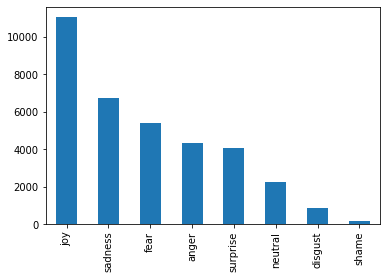

In [22]:
df['Emotion'].value_counts().plot(kind='bar')

In [23]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


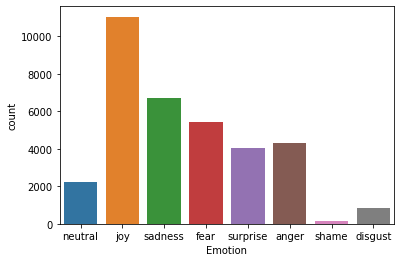

In [24]:
sns.countplot(df['Emotion'])

In [ ]:
dir(nfx)

In [30]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [31]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [34]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,?
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...


In [35]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.3, random_state=42) 

In [37]:
from sklearn.pipeline import Pipeline

In [38]:
pipe_lr = Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [40]:
pipe_lr.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [41]:
pipe_lr.score(x_test, y_test)

0.6200421536692853

In [44]:
ex1 = "This Book is well written, must read, I am happy"

In [45]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [47]:
pipe_lr.predict_proba([ex1])

array([[3.67290368e-03, 3.84703308e-03, 5.45734189e-03, 6.22642856e-01,
        4.67370906e-04, 3.52169008e-01, 3.00683155e-04, 1.14428023e-02]])

In [48]:
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [60]:
# save model and pipeline
import joblib
pipeline_file = open('emotion_classifier_pipe_lr_03_june_2021.pkl','wb')
joblib.dump(pipe_lr, pipeline_file)
pipeline_file.close()

TypeError: ignored